<a href="https://colab.research.google.com/github/rpindoria/Hello-World/blob/master/TeachingDataScience_Python_GlasgowUniversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Count Dataset from Glasgow Uni Python Course

In [13]:
#test 
name = input("What is Your name ? ")
if name=="Ravji":
  print ("Welcome ", name)
else:
  print("bye")

What is Your name ? Ravji
Welcome  Ravji


In [0]:
#Google Colab does everything that your Jupyter Notebook does and a little more.
# The little more part is that, you can use GPU and TPU for free.

In [4]:
# import relevant Python libraries and load the CSV file
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

#This option will create a “Choose File” button in your notebook, 
#using which you can upload your dataset to the notebook’s runtime. 
#This can be useful for small datasets.

from google.colab import files
uploaded = files.upload()

Saving count_20191202.csv to count_20191202.csv


In [6]:
#Here I’ll use show how to use pandas to store the uploaded csv file into a DataFrame.
import pandas as pd
import io
data = pd.read_csv(io.StringIO(uploaded['count_20191202.csv'].decode('utf-8')))


# we have to supply column names because the CSV file doesn't have a header row
data = pd.read_csv('count_20191202.csv', header=0, squeeze=True, names = ['Time', 'Locat\
ion', 'Count'])

print('preview the first few rows:')
print(data.head(5))

preview the first few rows:
                  Time Location  Count
0  11/10/2019 17:20:11    BO715      8
1  14/10/2019 08:36:11    BO715      7
2  14/10/2019 08:38:12    BO715      9
3  14/10/2019 08:40:11    BO715     14
4  14/10/2019 08:42:11    BO715     21


In [7]:
# identify the weekday for each row, store it in a new column
data['Date'] = pd.to_datetime(data['Time'])
data['Day'] = [date.day_name() for date in data['Date']]

# print out the total counts for each day
data.set_index('Day')
for day in ['Monday', 'Tuesday', 'Wednesday',
            'Thursday', 'Friday', 'Saturday', 'Sunday']:
    total = sum((data.loc[data['Day']==day])['Count'])
    print("%s %d" %(day, total))

Monday 149784
Tuesday 159499
Wednesday 174994
Thursday 172521
Friday 101975
Saturday 47981
Sunday 22393


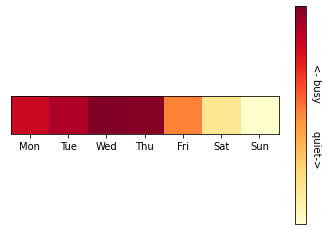

In [8]:
#We want to sort the days of the week in order. I'm using some slightly messy code for this ...
#Then we want to store the sums into a data frame so we can produce a nice visualization.
# helper code for sorting days of week  
#(ref. Dr. Jeremy Singer University of Glasgow)                                             
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturd\
ay', 'Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter))))

# now group by day
grouped_days = data.groupby('Day')['Count'].sum()
df = grouped_days.to_frame()

# sort days into order
df['Day_id'] = df.index
df['Day_id'] = df['Day_id'].map(sorterIndex)
df.sort_values('Day_id', inplace=True)

# produce a histogram (for visualization)
sums = np.array(df['Count'])
hist = np.expand_dims(sums, axis=0)

# neat x axis labels (first three letters of each weekday)
days = df.index.values.tolist()
days = list(map(lambda x: x[0:3], days))

# generate the graph
pos = np.arange(len(days))
plt.imshow(hist, cmap=plt.get_cmap('YlOrRd'))
cbar = plt.colorbar()

# tidy up the graph
cbar.ax.get_yaxis().set_ticks([])
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('<- busy         quiet->', rotation=270)

plt.yticks([])
plt.xticks(pos, days)
plt.show()

